In [1]:

import matplotlib.pyplot as plt
import numpy as np
import cv2
import pickle
%matplotlib inline

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
filename = 'E:\\glaucoma_final\\finalized_model_gnb.sav'
gnb = pickle.load(open(filename, 'rb'))

In [4]:
def Single_image_preprocessing(image):
    reshape = cv2.resize(image, (400, 400))
    blue, green, red = cv2.split(reshape)
    clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8, 8))
    Adaptive_histrogram = clahe.apply(green)
    return Adaptive_histrogram, green

In [5]:
def single_orb_feature_extraction(image):
    orb_feature_extracted = []
    image_features = []
    feature_image = np.copy(image)
    orb_features = []
    orb = cv2.ORB_create(nfeatures=500)
    keypoints_orb, descriptors = orb.detectAndCompute(feature_image, None)
    orb_features.append(descriptors[0:200])
    orb_features = np.ravel(orb_features)
    image_features.append(orb_features)
    orb_feature_extracted.append(np.concatenate(image_features))
    return orb_feature_extracted

In [6]:
def Show_key_points(image):
    orb = cv2.ORB_create()
    keypoints_orb, descriptors = orb.detectAndCompute(image, None)
    ORB_feature = cv2.drawKeypoints(image, keypoints_orb, None)
    return ORB_feature

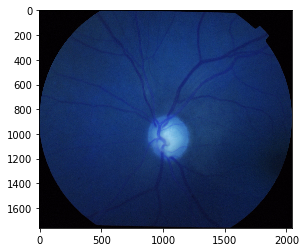

In [65]:
image = cv2.imread('E:\\glaucoma_final\\glaucoma_test\\30.jpg')
plt.imshow(image)

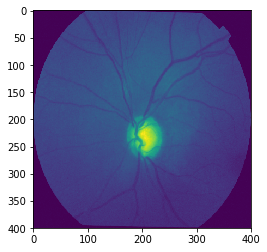

In [66]:
preprocessed_image, channel = Single_image_preprocessing(image)
plt.imshow(channel)


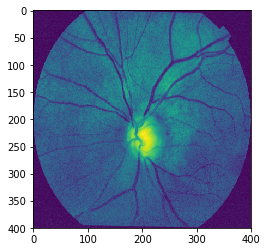

In [67]:
plt.imshow(preprocessed_image)

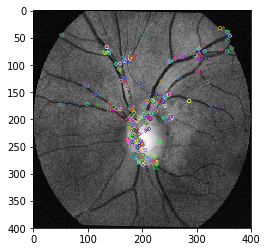

In [68]:
featured_image = Show_key_points(preprocessed_image)
plt.imshow(featured_image)

In [69]:
extracted_feature = single_orb_feature_extraction(preprocessed_image)


# predict to naive bayes

In [70]:
y_pred = gnb.predict(extracted_feature)
if(y_pred==0):
    print("glaucoma")
else:
    print("healthy")

glaucoma


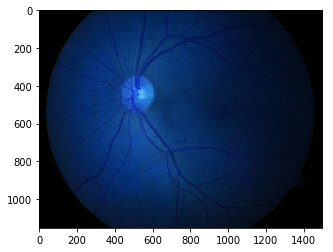

In [71]:
image1 = cv2.imread('E:\\glaucoma_final\\health\\31.jpg')
plt.imshow(image1)

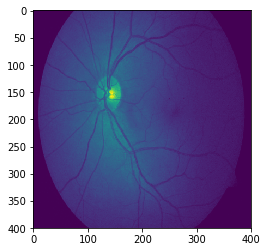

In [72]:
preprocessed_image1,channel1 = Single_image_preprocessing(image1)
plt.imshow(channel1)

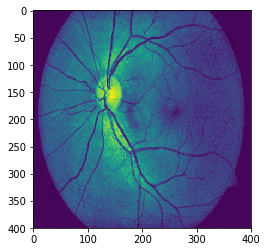

In [73]:
plt.imshow(preprocessed_image1)

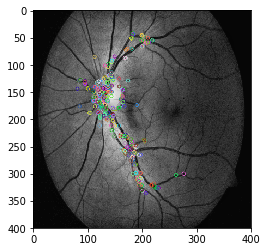

In [74]:
featured_image1 = Show_key_points(preprocessed_image1)
plt.imshow(featured_image1)

In [75]:
extracted_feature1 = single_orb_feature_extraction(preprocessed_image1)

In [76]:
y_pred1 = gnb.predict(extracted_feature1)
print(y_pred1)
if(y_pred1==0):
    print("glaucoma")
else:
    print("healthy")

[1.]
healthy
